In [45]:
f = open("/Users/mac/Desktop/adv_alad.txt","r")
inString = f.read()
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
#doc_a = "Adolf Hitler German adlf htl About this sound listen 20 April 1889 30 April 1945 was a German politician who was the leader of the Nazi Party Nationalsozialistische Deutsche Arbeiterpartei NSDAP Chancellor of Germany from 1933 to 1945 and Fhrer Leader of Nazi Germany from 1934 to 1945a As dictator Hitler initiated World War II in Europe with the invasion of Poland in September 1939 and was central to the Holocaust Hitler was born in Austriathen part of AustriaHungaryand was raised near Linz He moved to Germany in 1913 and was decorated during his service in the German Army in World War I In 1919 he joined the German Workers Party DAP the precursor of the NSDAP and was appointed leader of the NSDAP in 1921 In 1923 he attempted to seize power in a failed coup in Munich and was imprisoned While in jail he dictated the first volume of his autobiography and political manifesto Mein Kampf My Struggle Released in 1924 Hitler gained popular support by attacking the Treaty of Versailles and promoting PanGermanism antisemitism and anticommunism with charismatic oratory and Nazi propaganda He frequently denounced international capitalism and communism as being part of a Jewish conspiracy By 1933 the Nazi Party was the largest elected party in the German Reichstag but did not have a majority and no party was able to form a majority parliamentary coalition in support of a candidate for chancellor This led to former chancellor Franz von Papen and other conservative leaders persuading President Paul von Hindenburg to appoint Hitler as Chancellor on 30 January 1933 Shortly after the Reichstag passed the Enabling Act of 1933 which began the process of transforming the Weimar Republic into Nazi Germany a oneparty dictatorship based on the totalitarian and autocratic ideology of National Socialism Hitler aimed to eliminate Jews from Germany and establish a New Order to counter what he saw as the injustice of the postWorld War I international order dominated by Britain and France His first six years in power resulted in rapid economic recovery from the Great Depression the abrogation of restrictions imposed on Germany after World War I and the annexation of territories that were home to millions of ethnic Germans which gave him significant popular support Hitler sought Lebensraum living space for the German people in Eastern Europe and his aggressive foreign policy is considered to be the primary cause of the outbreak of World War II in Europe He directed largescale rearmament and on 1 September 1939 invaded Poland that resulted in Britain and France declaring war on Germany In June 1941 Hitler ordered an invasion of the Soviet Union By the end of 1941 German forces and the European Axis powers occupied most of Europe and North Africa In December 1941 he formally declared war on the United States bringing them directly into the conflict Failure to defeat the Soviets and the entry of the United States into the war forced Germany onto the defensive and it suffered a series of escalating defeats In the final days of the war during the Battle of Berlin in 1945 he married his longtime lover Eva Braun Less than two days later on 30 April 1945 the two killed themselves to avoid capture by the Soviet Red Army and their corpses were burned"
#doc_a= "AbdulRuhman N AbuMousa Tulkarm Palestine Mobile 970597410077 Emailadmd1095gmailcom Sept2013 now Palestine Technical University Palestine BSc Computer Systems Engineering Jul2017 Now Employer Location CYSTACK Ramallah Palestine Job Title Duties and responsibilities April2017 Sept2017 Employer Location Iniris Tulkarm Palestine Job Title Duties and responsibilities Jan2017 April2017 Employer Location Idex center Tulkarm Palestine Job Title Duties and responsibilities March2015 Dec2016 Employer Location self employed Tulkarm Palestine Job Title Duties and responsibilities Project description Vircy is a Virtual Reality Cycling game based on Android Platform a startup idea that Ive worked on June 2017 July2016 Center CYSTACK Training Title Web Applications Penetration Testing June 2016 Aug2016 Center CYSTACK Training Title University internship program Conetnts Malware Analysis 28 July2016 2 August 2016 Center Niqat Acedemy Autodesk Authorized Training Center Training Title 2D3D Design Basics Level 1 of 2 Conetnts Autodesk Fusion360 Dec2013Jan2014 Center AlManahel Tulkarm Palestine Training Title Windows Server Administration Conetnts Establish a network Server Configuration and backup Group Policies and Permissions Dec2013Jan2014 Center Palestine Technical Univeristy Tulkarm Palestine Training Title Personal Strategic Planning Conetnts Determine chances dangers goals mission and vision how to make life balanced June2010August2010 Center Tulkarm Municipality Computer Center Tulkarm Palestine Training Title Network Fundamentals Conetnts Network basics deal with network components network troubleshooting June2009August2009 Center Tulkarm Municipality Computer Center Tulkarm Palestine Training Title Multimedia Production Conetnts Photoshop Klek Arabic Calligraphy Sounds Editing Multimedia Builder Swish Max June2009August2009 Center Tulkarm Municipality Computer Center Tulkarm Palestine Training Title Computer Maintenance Conetnts softwarehardware troubleshooting Configuring June2009August2009 Center Tulkarm Municipality Computer Center Tulkarm Palestine Training Title Adobe Photoshop Conetnts Graphic design August2015Dec2016 Employer Location Library Club Palestine Job Title Duties and responsibilities Volunteer August2015October2015 Employer Location IEEE Palestine Job Title Duties and responsibilities Teaching Courses March2015Jan2016 Employer Location IEEE PTU Student Branch Tulkarm Job Title Duties and responsibilities Teaching Courses March2014March2015 Employer Location Microsoft Palestine Technical University Tulkarm Palestine Job Title Duties and responsibilities March2014 May2014 Employer Location Innovation Education Tulkarm Technology Center Palestine Palestine Technical University Job Title Duties and responsibilities Teaching Courses June2011 Jan2014 Employer Location Thaqafi Tulkarm Club Tulkarm Palestine Job Title Duties and responsibilities Teaching Courses June2010 Aug2010 Employer Location Tulkarm Municipality Tulkarm Computer Center Palestine Kid summer camp Job Title Duties and responsibilities Teaching Courses Jan 2017 title Jawwal 1st hackathon Place Ramallah Palestine Oct 2016 title ACM PCPC Place AnNajah University Nablus Palestine Sept 2016 title Zangah Game Jam Place Ramallah Palestine 29 Jan 201631 Jan2016 title Global Game Jam 2016 Place Leaders Ramallah Palestine 24 Oct2015 title IEEEExtreme V90 Place Tulkarm Municipality Trainings Center Palestine 4 Aug 2015 7 Aug 2015 title Middle East Student Branches Congress IEEE Place Amman Jordan 6 Nov 2014 title ACM PCPC Place Arab American University Palestine 18 Oct 2014 title IEEEXtremeV80 Place Palestine Technical University 29 Sep 2014 title PTUK Smart Days Leaders Int Entrepreneurship Training Place Palestine Technical University 9 Jan 2014 title IEEE Programmer V10 Place Palestine Technical University Programming Languages Java C PHP Programming Experience Android Development Unity3D Computer skills Operating Systems WindowsLinux Office Applications Word Excel Power Point Multimedia Production Photoshop inkscape Adobe Premier Adobe Flash Autodesk fusion 360 Adobe After Effects Teamwork Dynamic flexible selfmotivated and the able to work an important role as a team member and under pressure Communication Open minded able to communicate effectively good body language skills and Oral skills Problem solving Organized and able to solve problems creatively willing to learn new skills Languages English good Arabic Native Language Interests sports reading authoring listening to music"
doc_a=inString
# compile sample documents into a list
doc_set = [doc_a]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=1, id2word = dictionary, passes=20)


# In[3]:

ldamodel.print_topics(num_topics=1, num_words=10)


# In[4]:

p=ldamodel.print_topics(num_topics=1, num_words=5)[0]
root= p[1].split("+")
x=[]
y=[]
for sub in root:
    temp = sub.split("*")
    x.append(float(temp[0]))
    y.append(temp[1])
print("x is :")
print(x)
print("y is :")
print(y)


# In[5]:




x is :
[0.03, 0.015, 0.014, 0.014, 0.01]
y is :
['"aladdin" ', '"lamp" ', '"s" ', '"geni" ', '"palac"']


In [46]:

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
index = x
values = y
y_pos = np.arange(len(values))



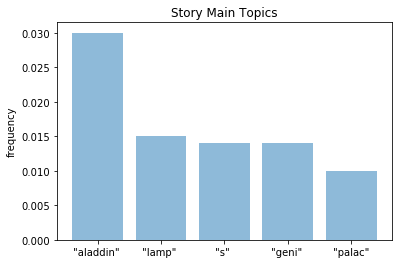

In [47]:
plt.bar(y_pos, index, align='center', alpha=0.5)
plt.title('Story Main Topics')
plt.ylabel('frequency')
plt.xticks(y_pos, values)
plt.show()